In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import pickle

killring = 10

FileNotFoundError: Could not find module 'C:\Users\alexg\Anaconda3\lib\site-packages\scipy\.libs\libbanded5x.GGYE3SWTNS4G5CDRKOVUOYRUQGWHCH6M.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [ ]:
df_train = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_trainu.csv')
df_val = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_valu.csv')
df_test = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_testu.csv')

df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

x_train, y_train = df_train[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_train[['Distance from vertex']]
x_val, y_val = df_val[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_val[['Distance from vertex']]

In [3]:
x_train.describe()

,LZ Scores,RPHI Scores,QuadVertex Scores
count,528332.000000,528332.000000,528332.000000
mean,0.554921,0.616661,0.118638
std,0.246271,0.216200,0.200560
min,0.000000,0.000000,0.000000
25%,0.376433,0.477364,0.000000
50%,0.577451,0.632357,0.022472
75%,0.747884,0.781983,0.142857
max,1.000000,1.000000,1.000000


In [4]:
model = DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)
# Fit the BDT to the training set
model.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)

In [5]:
preds_val = model.predict(x_val)
mae = mean_absolute_error(y_val, preds_val)

In [6]:
print(mae)

83.17379849475789


In [7]:
df_train_new = df_train.copy()
df_val_new = df_val.copy()

df_train_new.describe()

,Unnamed: 0,LZ Scores,RPHI Scores,QuadVertex Scores,Distance from vertex
count,528332.000000,528332.000000,528332.000000,528332.000000,528332.000000
mean,505.913329,0.554921,0.616661,0.118638,137.258484
std,571.350201,0.246271,0.216200,0.200560,159.662367
min,0.000000,0.000000,0.000000,0.000000,0.006596
25%,133.000000,0.376433,0.477364,0.000000,38.154783
50%,313.000000,0.577451,0.632357,0.022472,77.463825
75%,671.000000,0.747884,0.781983,0.142857,172.896015
max,4883.000000,1.000000,1.000000,1.000000,1175.934765


In [8]:
df_train_new.loc[df_train_new['Distance from vertex'] < killring, 'Distance from vertex'] = 1
df_train_new.loc[df_train_new['Distance from vertex'] >= killring, 'Distance from vertex'] = 0

df_val_new.loc[df_val_new['Distance from vertex'] < killring, 'Distance from vertex'] = 1
df_val_new.loc[df_val_new['Distance from vertex'] >= killring, 'Distance from vertex'] = 0


x_train, y_train = df_train_new[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_train_new[['Distance from vertex']]
x_val, y_val = df_val_new[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_val_new[['Distance from vertex']]

x_train.describe()
y_train.describe()

,Distance from vertex
count,528332.000000
mean,0.054307
std,0.226622
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
model2 = DecisionTreeClassifier(max_depth=3)
bdt = AdaBoostClassifier(base_estimator=model2, n_estimators=100, random_state=0)
# Fit the BDT to the training set
bdt.fit(x_train, y_train)

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=0)

In [10]:
bdt.score(x_train, y_train)
filename = 'modelunew.sav'
pickle.dump(bdt, open(filename, 'wb'))

In [11]:
bdt.score(x_val, y_val)

0.9410926543927406

In [12]:
preds_val = bdt.predict(x_val)

In [13]:
print(preds_val)

[0. 0. 0. ... 0. 0. 0.]


In [14]:
df_trainv = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_trainv.csv')
df_valv = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_valv.csv')
df_testv = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_testv.csv')

df_trainw = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_trainw.csv')
df_valw = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_valw.csv')
df_testw = pd.read_csv('C:/Users/alexg/OneDrive/Desktop/PX402 - Physics Project/Project Jupyter Notebooks/df_testw.csv')



df_trainv = df_trainv.dropna()
df_valv = df_valv.dropna()
df_testv = df_testv.dropna()

df_trainw = df_trainw.dropna()
df_valw = df_valw.dropna()
df_testw = df_testw.dropna()



df_train_new_w = df_trainw.copy()
df_val_new_w = df_valw.copy()

df_train_new_v = df_trainv.copy()
df_val_new_v = df_valv.copy()



df_train_new_w.loc[df_train_new_w['Distance from vertex'] < killring, 'Distance from vertex'] = 1
df_train_new_w.loc[df_train_new_w['Distance from vertex'] >= killring, 'Distance from vertex'] = 0

df_val_new_w.loc[df_val_new_w['Distance from vertex'] < killring, 'Distance from vertex'] = 1
df_val_new_w.loc[df_val_new_w['Distance from vertex'] >= killring, 'Distance from vertex'] = 0

df_train_new_v.loc[df_train_new_v['Distance from vertex'] < killring, 'Distance from vertex'] = 1
df_train_new_v.loc[df_train_new_v['Distance from vertex'] >= killring, 'Distance from vertex'] = 0

df_val_new_v.loc[df_val_new_v['Distance from vertex'] < killring, 'Distance from vertex'] = 1
df_val_new_v.loc[df_val_new_v['Distance from vertex'] >= killring, 'Distance from vertex'] = 0



x_trainv, y_trainv = df_train_new_v[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_train_new_v[['Distance from vertex']]
x_valv, y_valv = df_val_new_v[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_val_new_v[['Distance from vertex']]

x_trainw, y_trainw = df_train_new_w[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_train_new_w[['Distance from vertex']]
x_valw, y_valw = df_val_new_w[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_val_new_w[['Distance from vertex']]

In [15]:
modelv = DecisionTreeClassifier(max_depth=3)
bdtv = AdaBoostClassifier(base_estimator=modelv, n_estimators=100, random_state=0)
# Fit the BDT to the training set
bdtv.fit(x_trainv, y_trainv)

filename = 'modelvnew.sav'
pickle.dump(bdtv, open(filename, 'wb'))

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
modelw = DecisionTreeClassifier(max_depth=3)
bdtw = AdaBoostClassifier(base_estimator=modelw, n_estimators=100, random_state=0)
# Fit the BDT to the training set
bdtw.fit(x_trainw, y_trainw)

filename = 'modelwnew.sav'
pickle.dump(bdtw, open(filename, 'wb'))

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

random.seed(0)

print("Running...")


thr_std=0.2

E = Events("CheatedRecoFile_1.root")

view_u = View(E, "u")
view_v = View(E, "v")
view_w = View(E, "w")

u_x = view_u.x
u_z = view_u.z
u_adc = view_u.adc
u_truevtx_z = view_u.true_vtx_z
u_truevtx_x = view_u.true_vtx_x

v_x = view_v.x
v_z = view_v.z
v_adc = view_v.adc
v_truevtx_z = view_v.true_vtx_z
v_truevtx_x = view_v.true_vtx_x

w_x = view_w.x
w_z = view_w.z
w_adc = view_w.adc
w_truevtx_z = view_w.true_vtx_z
w_truevtx_x = view_w.true_vtx_x

def AoI(plane, event_number, thresholding=True, no_std=thr_std):
    if plane=="u":
        AoI_x = u_x[event_number]
        AoI_z = u_z[event_number]
        AoI_adc = u_adc[event_number]
        AoI_truevtxz = u_truevtx_z[event_number]
        AoI_truevtxx = u_truevtx_x[event_number]
    elif plane=="v":
        AoI_x = v_x[event_number]
        AoI_z = v_z[event_number]
        AoI_adc = v_adc[event_number]
        AoI_truevtxz = v_truevtx_z[event_number]
        AoI_truevtxx = v_truevtx_x[event_number]
    elif plane=="w":
        AoI_x = w_x[event_number]
        AoI_z = w_z[event_number]
        AoI_adc = w_adc[event_number]   
        AoI_truevtxz = w_truevtx_z[event_number]
        AoI_truevtxx = w_truevtx_x[event_number]
    else:
        print("PLane not u,v,w")
        
    if thresholding:
        mean = np.average(AoI_adc)
        std = np.std(AoI_adc)
        AoI_x = AoI_x[(mean-no_std*std<AoI_adc)]
        AoI_z = AoI_z[(mean-no_std*std<AoI_adc)]
        AoI_adc = AoI_adc[(mean-no_std*std<AoI_adc)]
    
    return AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx



Running...


In [3]:
from NeutrinoMetricGeneration import generate_score_dataframe

Running...


FileNotFoundError: Could not find module 'C:\Users\alexg\Anaconda3\lib\site-packages\scipy\.libs\libbanded5x.GGYE3SWTNS4G5CDRKOVUOYRUQGWHCH6M.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [ ]:
def create_BDTU_metrics(plane, sample, thresholding=True, no_std=thr_std):
    Zvert = []
    Zvert_true = []
    Xvert = []
    Xvert_true = []
    filename = 'modelunew.sav'
    load_modelu = pickle.load(open(filename, 'rb'))
    
    for i in tqdm(range(len(sample))):
        try:
            AoI_x, AoI_z, AoI_adc, Zvert_true_place, Xvert_true_place = AoI(plane, sample[i], thresholding, no_std)

            df_event = generate_score_dataframe(plane, sample[i])

            df_event['AoI_x'] = AoI_x
            df_event['AoI_z'] = AoI_z

            df_event.dropna()

            plt.clf()
            #print("df_event: ", df_event, len(df_event))
            #print("AoI_x: ", AoI_x, len(AoI_x))
            #print("AoI_z: ", AoI_z, len(AoI_z))

            df_eventx, df_eventy = df_event[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_event[['Distance from vertex']]

            df_event_preds = load_modelu.predict_proba(df_eventx)

            #print("df_event_preds: ", df_event_preds)

            ind = np.argmax(df_event_preds[:, 1])
            #print("ind:", ind)
            Zvert_place, Xvert_place = df_event['AoI_z'][ind], df_event['AoI_x'][ind]

            Zvert.append(Zvert_place)
            Xvert.append(Xvert_place)
            Zvert_true.append(Zvert_true_place)
            Xvert_true.append(Xvert_true_place)
        except:
            pass
        
    
    z_hist_data = np.abs(np.array(Zvert_true) - np.array(Zvert))
    x_hist_data = np.abs(np.array(Xvert_true) - np.array(Xvert))
    r_hist_data = (z_hist_data**2 + x_hist_data**2)**(1/2)

    return z_hist_data, x_hist_data, r_hist_data

sample = random.sample(range(0, len(u_x)), 3000)

In [ ]:
interaction_dictionary = {}

import pandas as pd
import csv
import pandas as pd
import numpy as np

with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
        
def interaction_finder(events):
    all_events = np.unique(events.event_number)
    x = [ events.interaction_type[np.where(events.event_number == e)] for e in all_events ]
    return x

def interaction_selector(interaction_dictionary):
    #CC and NC Split
    CC_indexes = []
    NC_indexes = []
    QEL_indexes = []
    DIS_indexes = []
    RES_indexes = []
    EL_indexes = []
    MU_indexes = []
    
    for i in range(len(interaction_dictionary)):
        first_two = (interaction_dictionary[i])[:2]
        if first_two == 'CC':
            CC_indexes.append(i)
        elif first_two == 'NC':
            NC_indexes.append(i)
            
    for i in range(len(interaction_dictionary)):
        first_three = (interaction_dictionary[i])[2:5]
        if first_three == 'QEL':
            QEL_indexes.append(i)
        elif first_three == 'DIS':
            DIS_indexes.append(i)
        elif first_three == 'RES':
            RES_indexes.append(i)
            
    for i in range(len(interaction_dictionary)-2):
        first_one = (interaction_dictionary[i])[6:7]
        if first_one == 'M':
            MU_indexes.append(i)
        elif first_one == 'E':
            EL_indexes.append(i)
        
    return CC_indexes, NC_indexes, QEL_indexes, DIS_indexes, RES_indexes, EL_indexes, MU_indexes

def interaction_splitting(interaction_type_array):
    CC_splitting = []
    NC_splitting = []
    QEL_splitting = []
    DIS_splitting = []
    RES_splitting = []
    EL_splitting = []
    MU_splitting = []

    for i in range(len(interaction_type_array)):
        if int(interaction_type_array[i][0]) in CC_indexes:
            CC_splitting.append(i)
        if int(interaction_type_array[i][0]) in NC_indexes:
            NC_splitting.append(i)
        if int(interaction_type_array[i][0]) in QEL_indexes:
            QEL_splitting.append(i)
        if int(interaction_type_array[i][0]) in RES_indexes:
            RES_splitting.append(i)
        if int(interaction_type_array[i][0]) in DIS_indexes:
            DIS_splitting.append(i)
        if int(interaction_type_array[i][0]) in MU_indexes:
            MU_splitting.append(i)
        if int(interaction_type_array[i][0]) in EL_indexes:
            EL_splitting.append(i)
        
    return CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting

def create_r68_and_50cm(hist_data):
    r68 =  np.percentile(hist_data, 68)
    fifty_cm_list = [num for num in hist_data if num > 50]
    pecentage_fifty_cm = len(fifty_cm_list) / len(hist_data)
    
    return r68, pecentage_fifty_cm

In [ ]:
z_hist_data, x_hist_data, r_hist_data = create_BDTU_metrics("u", sample)
plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | BDT 2D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | BDT 2D")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='y')
title = plt.title("Delta R | BDT 2D")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [14]:
CC_indexes, NC_indexes, QEL_indexes, DIS_indexes, RES_indexes, EL_indexes, MU_indexes = interaction_selector(interaction_dictionary)
CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting = interaction_splitting(interaction_finder(E))

In [15]:
z_hist_dataNC, x_hist_dataNC, r_hist_dataNC = create_BDTU_metrics("u", [20, 30, 40, 432])

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.18it/s]


<Figure size 640x480 with 0 Axes>

  0%|▎                                                                                | 4/1132 [00:02<13:55,  1.35it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  1%|▍                                                                                | 6/1132 [00:04<14:17,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  4%|███▍                                                                            | 48/1132 [00:35<14:28,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  4%|███▍                                                                            | 49/1132 [00:35<13:33,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  6%|█████▏                                                                          | 73/1132 [00:55<12:35,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  7%|█████▏                                                                          | 74/1132 [00:55<12:48,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  8%|██████▊                                                                         | 96/1132 [01:12<11:51,  1.46it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  9%|██████▊                                                                         | 97/1132 [01:12<11:38,  1.48it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 11%|████████▌                                                                      | 122/1132 [01:30<12:06,  1.39it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 11%|████████▋                                                                      | 125/1132 [01:32<10:32,  1.59it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 13%|██████████▎                                                                    | 148/1132 [01:47<12:19,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 13%|██████████▍                                                                    | 149/1132 [01:48<11:49,  1.39it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGen

 17%|█████████████▋                                                                 | 197/1132 [02:19<09:42,  1.60it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 18%|█████████████▉                                                                 | 200/1132 [02:22<11:40,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 20%|███████████████▋                                                               | 224/1132 [02:38<10:00,  1.51it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 20%|███████████████▉                                                               | 228/1132 [02:40<09:08,  1.65it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 25%|███████████████████▍                                                           | 279/1132 [03:16<10:00,  1.42it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 25%|███████████████████▌                                                           | 281/1132 [03:18<10:08,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 27%|█████████████████████                                                          | 301/1132 [03:32<10:36,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 27%|█████████████████████                                                          | 302/1132 [03:32<09:50,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 30%|███████████████████████▎                                                       | 334/1132 [03:54<11:35,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 30%|███████████████████████▌                                                       | 337/1132 [03:56<09:49,  1.35it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 34%|██████████████████████████▊                                                    | 384/1132 [04:29<09:17,  1.34it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 34%|███████████████████████████                                                    | 387/1132 [04:32<08:56,  1.39it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 36%|████████████████████████████▊                                                  | 412/1132 [04:50<08:59,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 36%|████████████████████████████▊                                                  | 413/1132 [04:51<09:25,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 39%|██████████████████████████████▋                                                | 440/1132 [05:11<08:19,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 39%|██████████████████████████████▊                                                | 441/1132 [05:12<08:49,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 41%|████████████████████████████████▍                                              | 465/1132 [05:30<07:48,  1.42it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 41%|████████████████████████████████▌                                              | 466/1132 [05:30<07:20,  1.51it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 41%|████████████████████████████████▋                                              | 468/1132 [05:32<07:08,  1.

 45%|███████████████████████████████████▏                                           | 504/1132 [05:58<08:35,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 45%|███████████████████████████████████▍                                           | 508/1132 [06:01<07:35,  1.37it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 48%|█████████████████████████████████████▊                                         | 542/1132 [06:28<08:00,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 48%|█████████████████████████████████████▉                                         | 544/1132 [06:30<07:48,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 51%|████████████████████████████████████████▌                                      | 581/1132 [06:59<06:41,  1.37it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 51%|████████████████████████████████████████▌                                      | 582/1132 [06:59<06:44,  1.36it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 54%|██████████████████████████████████████████▍                                    | 608/1132 [07:20<06:35,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 54%|██████████████████████████████████████████▌                                    | 610/1132 [07:22<06:17,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 58%|█████████████████████████████████████████████▉                                 | 658/1132 [07:53<05:26,  1.45it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 58%|█████████████████████████████████████████████▉                                 | 659/1132 [07:54<05:23,  1.46it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 60%|███████████████████████████████████████████████▋                               | 683/1132 [08:10<04:45,  1.57it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 60%|███████████████████████████████████████████████▋                               | 684/1132 [08:11<04:38,  1.61it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 64%|██████████████████████████████████████████████████▉                            | 729/1132 [08:43<04:36,  1.46it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 65%|███████████████████████████████████████████████████                            | 731/1132 [08:45<04:40,  1.43it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 67%|█████████████████████████████████████████████████████                          | 760/1132 [09:08<04:13,  1.47it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 67%|█████████████████████████████████████████████████████                          | 761/1132 [09:09<04:28,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 67%|█████████████████████████████████████████████████████▎                         | 764/1132 [09:11<04:41,  1.

 70%|███████████████████████████████████████████████████████▎                       | 792/1132 [09:30<03:44,  1.52it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 70%|███████████████████████████████████████████████████████▍                       | 795/1132 [09:32<03:47,  1.48it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 72%|█████████████████████████████████████████████████████████                      | 818/1132 [09:49<03:47,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 73%|█████████████████████████████████████████████████████████▍                     | 823/1132 [09:53<03:36,  1.43it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 77%|████████████████████████████████████████████████████████████▍                  | 866/1132 [10:25<03:09,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 77%|████████████████████████████████████████████████████████████▌                  | 867/1132 [10:26<03:00,  1.47it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 78%|█████████████████████████████████████████████████████████████▉                 | 888/1132 [10:41<02:49,  1.44it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 79%|██████████████████████████████████████████████████████████████                 | 889/1132 [10:42<02:46,  1.46it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 81%|███████████████████████████████████████████████████████████████▊               | 915/1132 [10:59<02:22,  1.52it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 81%|███████████████████████████████████████████████████████████████▉               | 916/1132 [11:00<02:19,  1.55it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 82%|█████████████████████████████████████████████████████████████████              | 933/1132 [11:12<02:14,  1.48it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 83%|█████████████████████████████████████████████████████████████████▎             | 935/1132 [11:13<02:05,  1.57it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 85%|███████████████████████████████████████████████████████████████████▍           | 967/1132 [11:36<02:08,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 86%|███████████████████████████████████████████████████████████████████▌           | 968/1132 [11:37<01:58,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 88%|████████████████████████████████████████████████████████████████████▉         | 1001/1132 [12:03<02:04,  1.05it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 89%|█████████████████████████████████████████████████████████████████████         | 1003/1132 [12:05<01:59,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 89%|█████████████████████████████████████████████████████████████████████▏        | 1004/1132 [12:06<02:08,  1.

 90%|██████████████████████████████████████████████████████████████████████▌       | 1024/1132 [12:22<01:18,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 91%|██████████████████████████████████████████████████████████████████████▋       | 1025/1132 [12:23<01:16,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 96%|██████████████████████████████████████████████████████████████████████████▌   | 1082/1132 [13:08<00:39,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 96%|██████████████████████████████████████████████████████████████████████████▊   | 1086/1132 [13:11<00:35,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 98%|████████████████████████████████████████████████████████████████████████████▌ | 1111/1132 [13:28<00:15,  1.39it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 98%|████████████████████████████████████████████████████████████████████████████▊ | 1115/1132 [13:31<00:12,  1.42it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

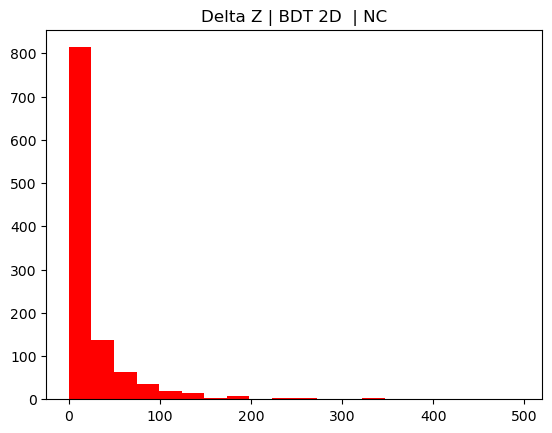

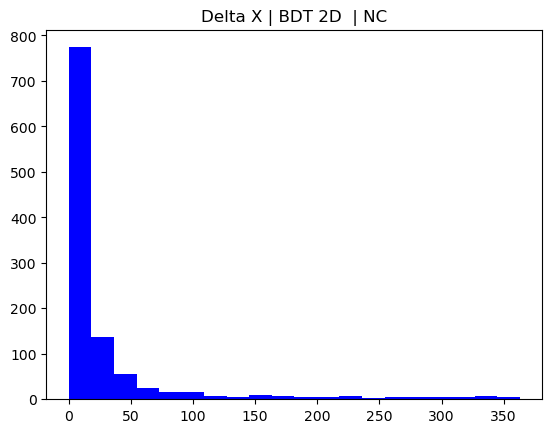

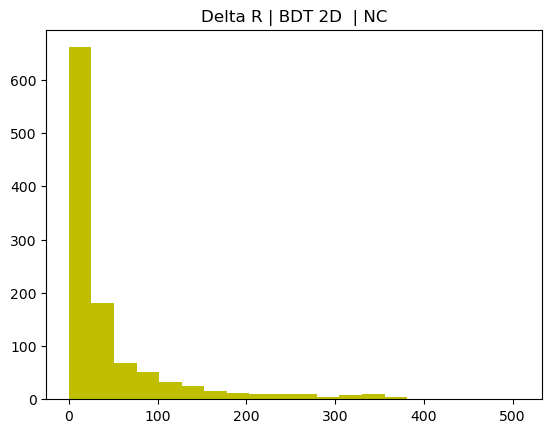

18.962598419189458 0.13755656108597286
16.953814086914065 0.13846153846153847
35.47833358764648 0.24343891402714932


  0%|                                                                                         | 0/1504 [00:00<?, ?it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|                                                                                 | 1/1504 [00:00<22:07,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  2%|█▏                                                                              | 23/1504 [00:23<23:55,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  2%|█▍                                                                              | 28/1504 [00:27<20:16,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  5%|████                                                                            | 76/1504 [01:08<21:03,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  5%|████                                                                            | 77/1504 [01:09<19:32,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  8%|██████▍                                                                        | 122/1504 [01:48<17:31,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point 

 10%|███████▋                                                                       | 146/1504 [02:08<18:28,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 10%|███████▋                                                                       | 147/1504 [02:09<20:56,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 11%|████████▋                                                                      | 165/1504 [02:27<17:42,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point 

 12%|█████████▉                                                                     | 188/1504 [02:45<18:11,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 13%|██████████▏                                                                    | 193/1504 [02:49<17:53,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 14%|███████████▏                                                                   | 214/1504 [03:10<21:18,  1.01it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 14%|███████████▎                                                                   | 215/1504 [03:10<19:15,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 15%|████████████▏                                                                  | 232/1504 [03:25<19:04,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 15%|████████████▏                                                                  | 233/1504 [03:26<20:02,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 18%|█████████████▉                                                                 | 266/1504 [03:56<18:15,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 18%|██████████████▏                                                                | 269/1504 [04:00<22:24,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 19%|███████████████▍                                                               | 293/1504 [04:25<18:32,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 20%|███████████████▍                                                               | 294/1504 [04:26<17:38,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 21%|████████████████▋                                                              | 318/1504 [04:48<15:07,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 21%|████████████████▊                                                              | 320/1504 [04:50<19:31,  1.01it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 25%|███████████████████▍                                                           | 369/1504 [05:33<15:02,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 25%|███████████████████▍                                                           | 370/1504 [05:34<14:24,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 26%|████████████████████▍                                                          | 390/1504 [05:51<17:06,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 26%|████████████████████▌                                                          | 391/1504 [05:52<15:38,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 27%|█████████████████████▌                                                         | 411/1504 [06:11<17:08,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 27%|█████████████████████▋                                                         | 412/1504 [06:12<15:45,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 30%|████████████████████████                                                       | 458/1504 [06:54<14:26,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 31%|████████████████████████▏                                                      | 460/1504 [06:55<13:10,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 32%|█████████████████████████▌                                                     | 486/1504 [07:31<20:01,  1.18s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 32%|█████████████████████████▋                                                     | 488/1504 [07:32<15:11,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 34%|██████████████████████████▊                                                    | 510/1504 [07:50<14:34,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 34%|██████████████████████████▊                                                    | 511/1504 [07:50<13:15,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 36%|████████████████████████████▏                                                  | 537/1504 [08:12<12:05,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 36%|████████████████████████████▎                                                  | 538/1504 [08:13<12:36,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 38%|█████████████████████████████▉                                                 | 570/1504 [08:40<12:20,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 38%|█████████████████████████████▉                                                 | 571/1504 [08:41<12:24,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 40%|███████████████████████████████▎                                               | 596/1504 [09:02<13:08,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 40%|███████████████████████████████▎                                               | 597/1504 [09:03<13:03,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 42%|████████████████████████████████▉                                              | 628/1504 [09:30<13:07,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 42%|█████████████████████████████████                                              | 630/1504 [09:32<12:51,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 44%|██████████████████████████████████▍                                            | 655/1504 [09:56<12:25,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 44%|██████████████████████████████████▍                                            | 656/1504 [09:57<12:34,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 45%|███████████████████████████████████▌                                           | 676/1504 [10:14<11:50,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 45%|███████████████████████████████████▌                                           | 677/1504 [10:15<12:23,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 46%|████████████████████████████████████▌                                          | 697/1504 [10:34<14:10,  1.05s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 46%|████████████████████████████████████▋                                          | 698/1504 [10:35<13:27,  1.00s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 48%|██████████████████████████████████████▎                                        | 729/1504 [11:02<10:41,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 49%|██████████████████████████████████████▎                                        | 730/1504 [11:03<09:57,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 50%|███████████████████████████████████████▎                                       | 748/1504 [11:19<13:24,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 50%|███████████████████████████████████████▎                                       | 749/1504 [11:20<13:11,  1.05s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 51%|████████████████████████████████████████▍                                      | 771/1504 [11:39<09:43,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 51%|████████████████████████████████████████▌                                      | 772/1504 [11:39<09:51,  1.24it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 53%|██████████████████████████████████████████                                     | 800/1504 [12:01<08:19,  1.41it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 53%|██████████████████████████████████████████                                     | 801/1504 [12:02<08:08,  1.44it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 54%|███████████████████████████████████████████                                    | 819/1504 [12:16<08:10,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 55%|███████████████████████████████████████████                                    | 821/1504 [12:17<09:05,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 56%|████████████████████████████████████████████▏                                  | 842/1504 [12:33<08:10,  1.35it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 56%|████████████████████████████████████████████▎                                  | 843/1504 [12:34<08:36,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 58%|█████████████████████████████████████████████▍                                 | 866/1504 [12:53<08:46,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 58%|█████████████████████████████████████████████▌                                 | 868/1504 [12:55<08:52,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 61%|████████████████████████████████████████████████                               | 914/1504 [13:31<08:22,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 61%|████████████████████████████████████████████████                               | 915/1504 [13:32<08:36,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 62%|█████████████████████████████████████████████████                              | 935/1504 [13:48<07:25,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 62%|█████████████████████████████████████████████████▏                             | 937/1504 [13:50<07:48,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 66%|████████████████████████████████████████████████████                           | 990/1504 [14:32<05:42,  1.50it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 66%|████████████████████████████████████████████████████▎                          | 995/1504 [14:36<07:18,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 68%|████████████████████████████████████████████████████▉                         | 1020/1504 [14:55<06:06,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

 71%|███████████████████████████████████████████████████████▏                      | 1063/1504 [15:34<06:54,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 71%|███████████████████████████████████████████████████████▏                      | 1064/1504 [15:35<06:27,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 72%|████████████████████████████████████████████████████████▏                     | 1084/1504 [15:54<05:44,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 72%|████████████████████████████████████████████████████████▍                     | 1088/1504 [15:57<05:22,  1.29it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 74%|█████████████████████████████████████████████████████████▍                    | 1108/1504 [16:15<05:57,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 74%|█████████████████████████████████████████████████████████▌                    | 1110/1504 [16:16<05:30,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 76%|██████████████████████████████████████████████████████████▉                   | 1137/1504 [16:40<05:31,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 76%|███████████████████████████████████████████████████████████                   | 1138/1504 [16:41<05:07,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 77%|███████████████████████████████████████████████████████████▉                  | 1156/1504 [16:57<04:47,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 77%|████████████████████████████████████████████████████████████                  | 1158/1504 [16:59<04:55,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 79%|█████████████████████████████████████████████████████████████▎                | 1183/1504 [17:20<04:47,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 79%|█████████████████████████████████████████████████████████████▌                | 1186/1504 [17:23<04:55,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 80%|██████████████████████████████████████████████████████████████▎               | 1201/1504 [17:35<04:05,  1.24it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 80%|██████████████████████████████████████████████████████████████▍               | 1203/1504 [17:38<04:53,  1.02it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 82%|███████████████████████████████████████████████████████████████▊              | 1231/1504 [18:01<03:36,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 82%|███████████████████████████████████████████████████████████████▉              | 1232/1504 [18:02<03:37,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 84%|█████████████████████████████████████████████████████████████████▏            | 1256/1504 [18:24<03:29,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 84%|█████████████████████████████████████████████████████████████████▏            | 1257/1504 [18:24<03:09,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 85%|██████████████████████████████████████████████████████████████████▏           | 1276/1504 [18:40<02:59,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 85%|██████████████████████████████████████████████████████████████████▎           | 1278/1504 [18:42<03:04,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:17

 86%|███████████████████████████████████████████████████████████████████▎          | 1298/1504 [18:58<02:47,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 87%|███████████████████████████████████████████████████████████████████▋          | 1305/1504 [19:05<03:00,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 88%|████████████████████████████████████████████████████████████████████▋         | 1325/1504 [19:20<02:23,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 88%|████████████████████████████████████████████████████████████████████▊         | 1326/1504 [19:21<02:35,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 89%|█████████████████████████████████████████████████████████████████████▊        | 1346/1504 [19:37<02:02,  1.29it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 90%|█████████████████████████████████████████████████████████████████████▊        | 1347/1504 [19:38<02:18,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 91%|██████████████████████████████████████████████████████████████████████▋       | 1363/1504 [19:51<02:00,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 91%|██████████████████████████████████████████████████████████████████████▋       | 1364/1504 [19:52<01:50,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 92%|███████████████████████████████████████████████████████████████████████▉      | 1386/1504 [20:13<01:41,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = s

 94%|█████████████████████████████████████████████████████████████████████████     | 1408/1504 [20:32<01:27,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 94%|█████████████████████████████████████████████████████████████████████████     | 1409/1504 [20:33<01:24,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 95%|██████████████████████████████████████████████████████████████████████████▏   | 1430/1504 [20:52<01:00,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 95%|██████████████████████████████████████████████████████████████████████████▏   | 1431/1504 [20:53<01:01,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1449/1504 [21:10<00:51,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 96%|███████████████████████████████████████████████████████████████████████████▏  | 1450/1504 [21:11<00:50,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 98%|████████████████████████████████████████████████████████████████████████████▍ | 1474/1504 [21:34<00:27,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 98%|████████████████████████████████████████████████████████████████████████████▍ | 1475/1504 [21:35<00:27,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 99%|█████████████████████████████████████████████████████████████████████████████▍| 1494/1504 [21:51<00:08,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 99%|█████████████████████████████████████████████████████████████████████████████▌| 1495/1504 [21:52<00:08,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGen

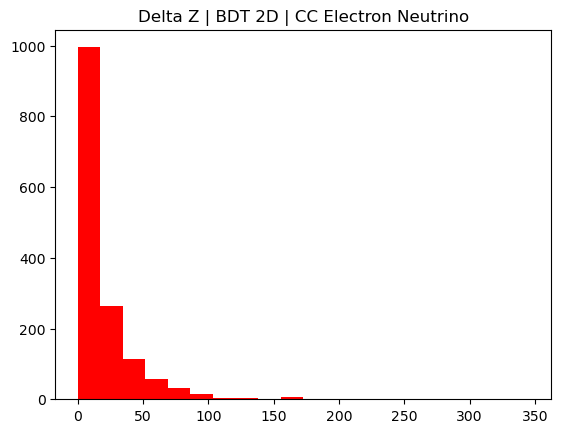

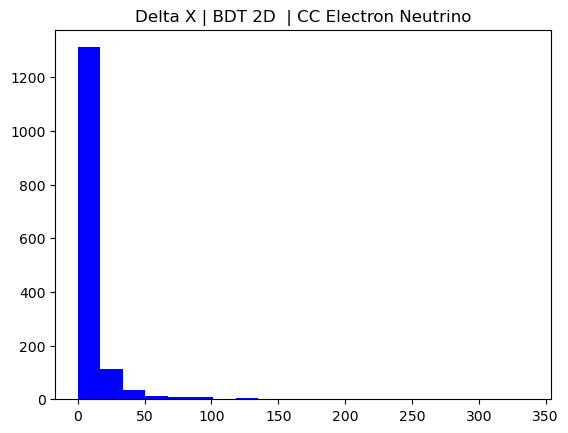

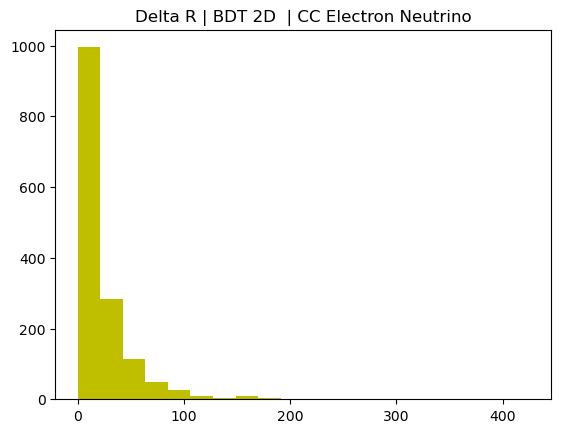

18.69342651367188 0.08489304812834225
5.371508407592774 0.02606951871657754
22.2964599609375 0.11163101604278075


  0%|                                                                                 | 3/2074 [00:02<30:17,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|▏                                                                                | 6/2074 [00:05<30:33,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  7%|█████▎                                                                         | 140/2074 [02:28<25:31,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
  8%|█████▉                                                                         | 157/2074 [02:48<29:31,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
  8%|██████                                                                         | 158/2074 [02:49<29:24,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Use

 12%|█████████▎                                                                     | 244/2074 [04:22<33:45,  1.11s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 12%|█████████▌                                                                     | 252/2074 [04:32<44:50,  1.48s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 12%|█████████▊                                                                     | 259/2074 [04:39<31:57,  1.

 15%|███████████▌                                                                   | 303/2074 [05:24<30:46,  1.04s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 15%|███████████▋                                                                   | 308/2074 [05:28<24:45,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 18%|██████████████▏                                                                | 371/2074 [06:42<30:33,  1.08s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 18%|██████████████▏                                                                | 373/2074 [06:43<25:49,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 22%|█████████████████▎                                                             | 456/2074 [08:13<36:41,  1.36s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 22%|█████████████████▌                                                             | 460/2074 [08:17<26:13,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 28%|█████████████████████▊                                                         | 573/2074 [10:21<29:22,  1.17s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 28%|██████████████████████▎                                                        | 585/2074 [10:33<26:43,  1.08s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 33%|█████████████████████████▊                                                     | 677/2074 [12:21<27:15,  1.17s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 33%|█████████████████████████▊                                                     | 678/2074 [12:23<32:44,  1.41s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 33%|█████████████████████████▉                                                     | 681/2074 [12:26<25:46,  1.11s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/

 39%|██████████████████████████████▊                                                | 810/2074 [14:43<26:47,  1.27s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 39%|██████████████████████████████▉                                                | 812/2074 [14:45<22:20,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 42%|█████████████████████████████████▎                                             | 873/2074 [15:46<21:22,  1.07s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 43%|█████████████████████████████████▌                                             | 882/2074 [15:55<19:45,  1.01it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 43%|█████████████████████████████████▉                                             | 891/2074 [16:06<20:07,  1.

 47%|█████████████████████████████████████▏                                         | 977/2074 [17:47<17:27,  1.05it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 47%|█████████████████████████████████████▌                                         | 985/2074 [17:54<17:37,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 53%|█████████████████████████████████████████▍                                    | 1101/2074 [19:39<14:43,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 53%|█████████████████████████████████████████▍                                    | 1103/2074 [19:40<14:50,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 56%|███████████████████████████████████████████▋                                  | 1160/2074 [20:35<16:23,  1.08s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 56%|███████████████████████████████████████████▋                                  | 1161/2074 [20:35<14:00,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 59%|█████████████████████████████████████████████▊                                | 1217/2074 [21:31<13:41,  1.04it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 59%|█████████████████████████████████████████████▊                                | 1218/2074 [21:32<12:52,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 62%|████████████████████████████████████████████████▋                             | 1293/2074 [22:45<11:44,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 63%|████████████████████████████████████████████████▊                             | 1297/2074 [22:48<11:53,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 65%|███████████████████████████████████████████████████                           | 1357/2074 [23:52<11:03,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 66%|███████████████████████████████████████████████████▍                          | 1369/2074 [24:05<13:03,  1.11s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 69%|██████████████████████████████████████████████████████▏                       | 1440/2074 [25:17<13:06,  1.24s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 70%|██████████████████████████████████████████████████████▋                       | 1455/2074 [25:33<13:14,  1.28s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 74%|█████████████████████████████████████████████████████████▍                    | 1528/2074 [26:51<10:01,  1.10s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 74%|█████████████████████████████████████████████████████████▌                    | 1529/2074 [26:52<09:02,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 76%|███████████████████████████████████████████████████████████▋                  | 1586/2074 [27:49<08:40,  1.07s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 77%|███████████████████████████████████████████████████████████▋                  | 1588/2074 [27:50<07:15,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 80%|██████████████████████████████████████████████████████████████▋               | 1668/2074 [29:09<05:08,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 81%|███████████████████████████████████████████████████████████████               | 1676/2074 [29:17<06:31,  1.02it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 84%|█████████████████████████████████████████████████████████████████▍            | 1740/2074 [30:20<06:08,  1.10s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 84%|█████████████████████████████████████████████████████████████████▊            | 1750/2074 [30:29<05:44,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 87%|████████████████████████████████████████████████████████████████████          | 1810/2074 [31:26<03:42,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 88%|████████████████████████████████████████████████████████████████████▎         | 1818/2074 [31:33<03:42,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 91%|██████████████████████████████████████████████████████████████████████▊       | 1883/2074 [32:32<02:46,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 91%|██████████████████████████████████████████████████████████████████████▉       | 1887/2074 [32:36<02:49,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 94%|█████████████████████████████████████████████████████████████████████████     | 1942/2074 [33:24<01:29,  1.47it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 94%|█████████████████████████████████████████████████████████████████████████     | 1943/2074 [33:25<01:47,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 96%|██████████████████████████████████████████████████████████████████████████▊   | 1989/2074 [34:08<01:29,  1.05s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 96%|██████████████████████████████████████████████████████████████████████████▉   | 1993/2074 [34:13<01:36,  1.19s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 98%|████████████████████████████████████████████████████████████████████████████▋ | 2038/2074 [34:56<00:47,  1.33s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 99%|█████████████████████████████████████████████████████████████████████████████▏| 2052/2074 [35:11<00:21,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 99%|█████████████████████████████████████████████████████████████████████████████▏| 2053/2074 [35:11<00:19,  1.

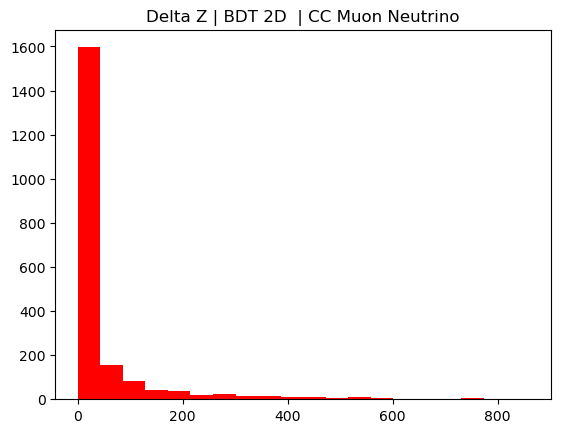

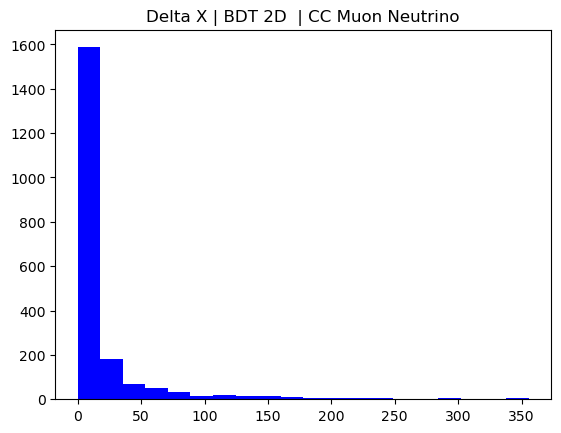

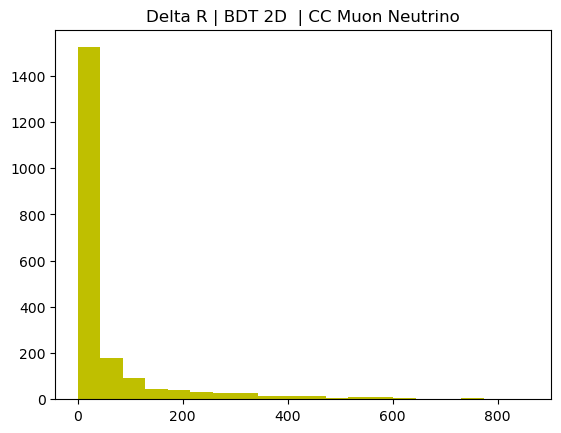

18.941127014160156 0.20058708414872797
8.3988623046875 0.10567514677103718
28.070819778442385 0.2363013698630137


In [16]:
z_hist_dataNC, x_hist_dataNC, r_hist_dataNC = create_BDTU_metrics("u", NC_splitting)

plt.clf()
x = plt.hist(z_hist_dataNC, 20, color='r')
title = plt.title("Delta Z | BDT 2D  | NC")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataNC, 20, color='b')
title = plt.title("Delta X | BDT 2D  | NC")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataNC, 20, color='y')
title = plt.title("Delta R | BDT 2D  | NC")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataNC)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataNC)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataNC)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)




z_hist_dataCCE, x_hist_dataCCE, r_hist_dataCCE = create_BDTU_metrics("u", EL_splitting)

plt.clf()
x = plt.hist(z_hist_dataCCE, 20, color='r')
title = plt.title("Delta Z | BDT 2D | CC Electron Neutrino")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataCCE, 20, color='b')
title = plt.title("Delta X | BDT 2D  | CC Electron Neutrino")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataCCE, 20, color='y')
title = plt.title("Delta R | BDT 2D  | CC Electron Neutrino")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataCCE)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataCCE)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataCCE)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)





z_hist_dataCCMU, x_hist_dataCCMU, r_hist_dataCCMU = create_BDTU_metrics("u", MU_splitting)

plt.clf()
x = plt.hist(z_hist_dataCCMU, 20, color='r')
title = plt.title("Delta Z | BDT 2D  | CC Muon Neutrino")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataCCMU, 20, color='b')
title = plt.title("Delta X | BDT 2D  | CC Muon Neutrino")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataCCMU, 20, color='y')
title = plt.title("Delta R | BDT 2D  | CC Muon Neutrino")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataCCMU)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataCCMU)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataCCMU)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [55]:
z_hist_data, x_hist_data, r_hist_data = create_BDTU_metrics("u", sample) #139 is a problem

  0%|                                                                                 | 1/3000 [00:00<34:57,  1.43it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|                                                                                 | 4/3000 [00:02<37:36,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  3%|██                                                                              | 79/3000 [01:17<36:35,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  3%|██▏                                                                             | 81/3000 [01:18<39:58,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  4%|███                                                                            | 117/3000 [01:54<56:17,  1.17s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  4%|███▏                                                                           | 121/3000 [01:57<38:54,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  6%|████▌                                                                          | 171/3000 [02:51<41:38,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  6%|████▌                                                                          | 174/3000 [02:53<39:29,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

  7%|█████▌                                                                         | 213/3000 [03:31<45:19,  1.02it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
  7%|█████▊                                                                         | 219/3000 [03:36<44:16,  1.05it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  9%|██████▉                                                                        | 263/3000 [04:21<41:31,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  9%|██████▉                                                                        | 265/3000 [04:22<38:49,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGen

 10%|████████▏                                                                      | 312/3000 [05:04<48:47,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 10%|████████▏                                                                      | 313/3000 [05:04<44:34,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 11%|████████▊                                                                      | 336/3000 [05:26<37:37,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 11%|████████▉                                                                      | 338/3000 [05:28<35:13,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 12%|█████████▋                                                                     | 367/3000 [06:05<48:57,  1.12s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 12%|█████████▋                                                                     | 369/3000 [06:07<46:41,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 13%|██████████▌                                                                    | 402/3000 [06:43<34:12,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 14%|██████████▋                                                                    | 408/3000 [06:49<39:49,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 14%|███████████▏                                                                   | 427/3000 [07:05<34:44,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 14%|███████████▎                                                                   | 430/3000 [07:07<35:39,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 17%|█████████████                                                                  | 497/3000 [08:14<59:44,  1.43s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 17%|█████████████▏                                                                 | 501/3000 [08:19<54:34,  1.31s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 18%|██████████████▏                                                                | 540/3000 [08:59<58:59,  1.44s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

 20%|███████████████▌                                                               | 589/3000 [10:02<33:23,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 20%|███████████████▌                                                               | 592/3000 [10:04<32:40,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 21%|████████████████▌                                                              | 629/3000 [10:48<58:08,  1.47s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 21%|████████████████▋                                                              | 633/3000 [10:52<39:56,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 24%|██████████████████▋                                                            | 711/3000 [12:06<38:45,  1.02s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 24%|██████████████████▊                                                            | 714/3000 [12:09<35:41,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 25%|███████████████████▋                                                           | 749/3000 [12:48<30:01,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 25%|███████████████████▊                                                           | 754/3000 [12:54<49:19,  1.32s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 26%|████████████████████▌                                                          | 783/3000 [13:22<32:21,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 26%|████████████████████▋                                                          | 787/3000 [13:26<35:22,  1.04it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 27%|█████████████████████▋                                                         | 824/3000 [14:04<32:23,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 28%|█████████████████████▊                                                         | 829/3000 [14:10<36:05,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 30%|███████████████████████▌                                                       | 894/3000 [15:21<35:26,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

 31%|████████████████████████▌                                                      | 932/3000 [15:58<30:11,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 31%|████████████████████████▋                                                      | 936/3000 [16:01<30:16,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 32%|█████████████████████████▎                                                     | 960/3000 [16:22<23:24,  1.45it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 32%|█████████████████████████▎                                                     | 961/3000 [16:23<24:37,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 33%|██████████████████████████                                                    | 1001/3000 [16:59<29:35,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 34%|██████████████████████████▏                                                   | 1007/3000 [17:05<33:02,  1.01it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 36%|████████████████████████████▎                                                 | 1087/3000 [18:23<28:03,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 36%|████████████████████████████▎                                                 | 1090/3000 [18:25<24:55,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 38%|█████████████████████████████▊                                                | 1147/3000 [19:25<26:41,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 38%|█████████████████████████████▉                                                | 1150/3000 [19:29<41:29,  1.35s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 40%|███████████████████████████████▎                                              | 1205/3000 [20:28<32:40,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 40%|███████████████████████████████▍                                              | 1209/3000 [20:32<27:11,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 41%|████████████████████████████████▎                                             | 1242/3000 [21:04<25:05,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 42%|█████████████████████████████████                                             | 1273/3000 [21:30<26:13,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 42%|█████████████████████████████████                                             | 1274/3000 [21:31<24:30,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:17

 44%|██████████████████████████████████▏                                           | 1317/3000 [22:14<33:04,  1.18s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 44%|██████████████████████████████████▎                                           | 1318/3000 [22:15<32:07,  1.15s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 45%|███████████████████████████████████▎                                          | 1356/3000 [22:59<23:16,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

 46%|███████████████████████████████████▉                                          | 1382/3000 [23:19<22:48,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 46%|████████████████████████████████████                                          | 1386/3000 [23:23<21:46,  1.24it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 46%|████████████████████████████████████                                          |

 47%|████████████████████████████████████▊                                         | 1414/3000 [23:52<32:17,  1.22s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 47%|████████████████████████████████████▊                                         | 1415/3000 [23:53<27:55,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 48%|█████████████████████████████████████▍                                        | 1440/3000 [24:16<19:56,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 48%|█████████████████████████████████████▍                                        | 1441/3000 [24:16<19:11,  1.35it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 49%|██████████████████████████████████████▎                                       | 1472/3000 [24:45<19:34,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 49%|██████████████████████████████████████▎                                       | 1475/3000 [24:47<19:29,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 50%|███████████████████████████████████████▎                                      | 1512/3000 [25:23<22:07,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 50%|███████████████████████████████████████▎                                      | 1514/3000 [25:24<19:30,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 52%|████████████████████████████████████████▍                                     | 1555/3000 [26:07<42:36,  1.77s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 52%|████████████████████████████████████████▍                                     | 1556/3000 [26:08<35:44,  1.49s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 53%|█████████████████████████████████████████                                     | 1578/3000 [26:28<21:30,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 53%|█████████████████████████████████████████                                     | 1581/3000 [26:30<18:26,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 55%|██████████████████████████████████████████▋                                   | 1643/3000 [27:34<23:41,  1.05s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 55%|██████████████████████████████████████████▋                                   | 1644/3000 [27:35<21:32,  1.05it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 56%|███████████████████████████████████████████▊                                  | 1685/3000 [28:17<18:08,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 56%|███████████████████████████████████████████▊                                  | 1686/3000 [28:18<18:37,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 57%|████████████████████████████████████████████▍                                 | 1710/3000 [28:39<23:16,  1.08s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 57%|████████████████████████████████████████████▌                                 | 1714/3000 [28:42<17:48,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 58%|█████████████████████████████████████████████▏                                | 1736/3000 [29:02<20:20,  1.04it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point 

 59%|█████████████████████████████████████████████▉                                | 1769/3000 [29:30<14:48,  1.39it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 59%|██████████████████████████████████████████████                                | 1772/3000 [29:33<16:10,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 60%|██████████████████████████████████████████████▉                               | 1804/3000 [30:08<31:15,  1.57s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 60%|██████████████████████████████████████████████▉                               | 1805/3000 [30:09<27:43,  1.39s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 61%|███████████████████████████████████████████████▋                              | 1833/3000 [30:38<15:20,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 61%|███████████████████████████████████████████████▋                              | 1834/3000 [30:39<16:37,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 62%|████████████████████████████████████████████████▌                             | 1866/3000 [31:10<18:28,  1.02it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 62%|████████████████████████████████████████████████▋                             | 1871/3000 [31:16<23:24,  1.24s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 64%|██████████████████████████████████████████████████                            | 1926/3000 [32:17<20:07,  1.12s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 64%|██████████████████████████████████████████████████                            | 1927/3000 [32:17<17:20,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 65%|██████████████████████████████████████████████████▌                           | 1945/3000 [32:36<13:19,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 65%|██████████████████████████████████████████████████▌                           | 1946/3000 [32:37<13:19,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 67%|████████████████████████████████████████████████████▍                         | 2016/3000 [33:41<14:50,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 67%|████████████████████████████████████████████████████▍                         | 2018/3000 [33:42<12:11,  1.34it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 69%|█████████████████████████████████████████████████████▋                        | 2063/3000 [34:21<10:41,  1.46it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 69%|█████████████████████████████████████████████████████▊                        | 2069/3000 [34:28<15:35,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 70%|██████████████████████████████████████████████████████▉                       | 2111/3000 [35:07<13:17,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 70%|██████████████████████████████████████████████████████▉                       | 2112/3000 [35:08<11:55,  1.24it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 72%|████████████████████████████████████████████████████████                      | 2156/3000 [35:52<14:36,  1.04s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 72%|████████████████████████████████████████████████████████                      | 2157/3000 [35:54<16:17,  1.16s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 73%|████████████████████████████████████████████████████████▊                     | 2183/3000 [36:23<12:22,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 73%|████████████████████████████████████████████████████████▊                     | 2184/3000 [36:24<12:46,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 74%|█████████████████████████████████████████████████████████▋                    | 2221/3000 [37:03<11:03,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 74%|█████████████████████████████████████████████████████████▊                    | 2222/3000 [37:04<09:59,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 75%|██████████████████████████████████████████████████████████▌                   | 2250/3000 [37:34<13:03,  1.04s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 75%|██████████████████████████████████████████████████████████▌                   | 2254/3000 [37:36<09:47,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 76%|███████████████████████████████████████████████████████████▍                  | 2288/3000 [38:11<13:11,  1.11s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 76%|███████████████████████████████████████████████████████████▌                  | 2293/3000 [38:17<13:51,  1.18s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Ju

 78%|████████████████████████████████████████████████████████████▌                 | 2327/3000 [38:56<12:53,  1.15s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 78%|████████████████████████████████████████████████████████████▌                 | 2328/3000 [38:57<11:34,  1.03s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 78%|█████████████████████████████████████████████████████████████▏                | 2354/3000 [39:21<09:08,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 78%|█████████████████████████████████████████████████████████████▏                | 2355/3000 [39:22<08:20,  1.29it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 79%|█████████████████████████████████████████████████████████████▉                | 2384/3000 [39:49<08:35,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 80%|██████████████████████████████████████████████████████████████                | 2388/3000 [39:54<10:20,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricG

 81%|██████████████████████████████████████████████████████████████▊               | 2417/3000 [40:22<08:15,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = s

 82%|███████████████████████████████████████████████████████████████▌              | 2447/3000 [40:54<09:12,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 82%|███████████████████████████████████████████████████████████████▋              | 2448/3000 [40:55<08:12,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 82%|████████████████████████████████████████████████████████████████▎             | 2473/3000 [41:19<07:58,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 83%|████████████████████████████████████████████████████████████████▍             | 2480/3000 [41:25<09:03,  1.04s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 83%|████████████████████████████████████████████████████████████████▌             |

 84%|█████████████████████████████████████████████████████████████████▌            | 2520/3000 [42:06<12:02,  1.51s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 84%|█████████████████████████████████████████████████████████████████▌            | 2521/3000 [42:07<10:39,  1.34s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 86%|██████████████████████████████████████████████████████████████████▋           | 2567/3000 [42:53<08:36,  1.19s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 86%|██████████████████████████████████████████████████████████████████▊           | 2568/3000 [42:54<07:21,  1.02s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 87%|███████████████████████████████████████████████████████████████████▌          | 2597/3000 [43:25<10:35,  1.58s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 87%|███████████████████████████████████████████████████████████████████▊          | 2608/3000 [43:35<06:07,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 88%|████████████████████████████████████████████████████████████████████▌         | 2635/3000 [44:00<05:25,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 88%|████████████████████████████████████████████████████████████████████▌         | 2636/3000 [44:01<05:18,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyt

 89%|█████████████████████████████████████████████████████████████████████▍        | 2671/3000 [44:35<05:32,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 89%|█████████████████████████████████████████████████████████████████████▍        | 2672/3000 [44:36<04:47,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 90%|██████████████████████████████████████████████████████████████████████▎       | 2706/3000 [45:09<04:32,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 90%|██████████████████████████████████████████████████████████████████████▍       | 2711/3000 [45:13<04:20,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 93%|████████████████████████████████████████████████████████████████████████▏     | 2777/3000 [46:24<03:48,  1.03s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 93%|████████████████████████████████████████████████████████████████████████▏     | 2778/3000 [46:25<03:39,  1.01it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 95%|██████████████████████████████████████████████████████████████████████████▏   | 2854/3000 [47:48<02:35,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 95%|██████████████████████████████████████████████████████████████████████████▏   | 2855/3000 [47:49<02:19,  1.04it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 97%|███████████████████████████████████████████████████████████████████████████▋  | 2910/3000 [48:50<01:25,  1.05it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 97%|███████████████████████████████████████████████████████████████████████████▋  | 2911/3000 [48:51<01:16,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 98%|████████████████████████████████████████████████████████████████████████████▍ | 2938/3000 [49:16<01:12,  1.18s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 98%|████████████████████████████████████████████████████████████████████████████▌ | 2943/3000 [49:20<00:48,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 99%|█████████████████████████████████████████████████████████████████████████████▌| 2981/3000 [49:58<00:19,  1.03s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 99%|█████████████████████████████████████████████████████████████████████████████▌| 2984/3000 [50:00<00:13,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

<Figure size 640x480 with 0 Axes>

22.237839355468754 0.15353535353535352
9.55739379882813 0.09831649831649832
31.745859527587893 0.21952861952861952


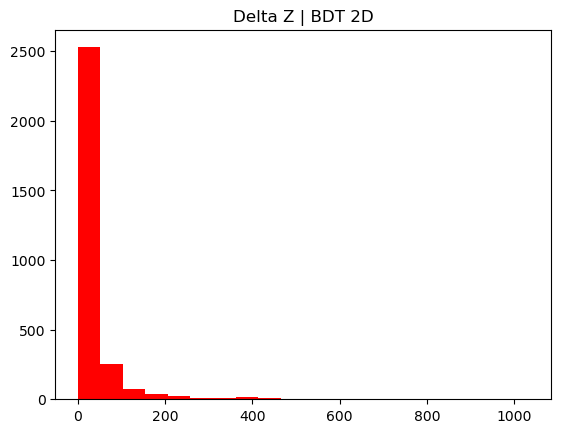

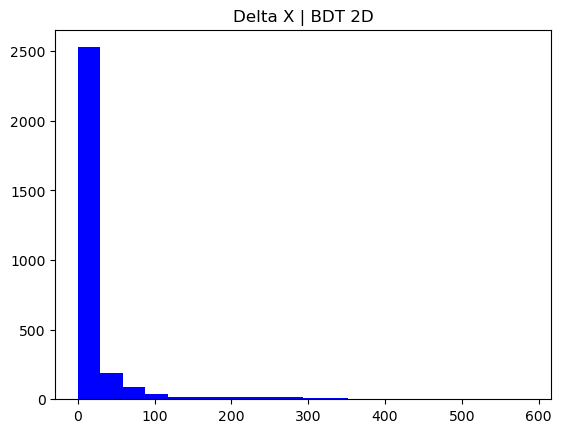

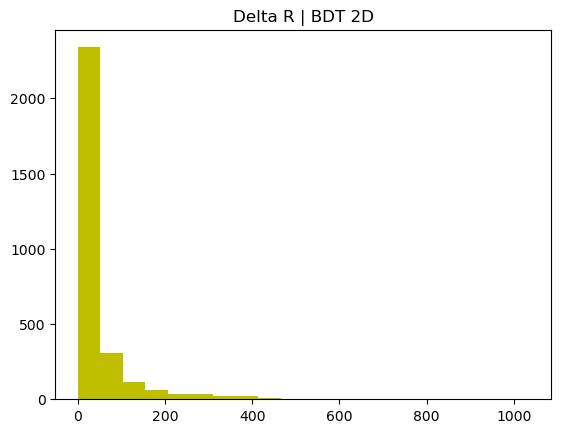

In [57]:
r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | BDT 2D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | BDT 2D")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='y')
title = plt.title("Delta R | BDT 2D")
plt.show()

In [17]:
def find_error_BDT(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    for i in range(len(samples)):
        z_hist_data, x_hist_data, r_hist_data = create_BDTU_metrics("u", list(samples[i]))
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)
        
        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
    
    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    
    return z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error

In [19]:
z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error = find_error_BDT(sample, 5)
print(z_hist_means, "\nError Z:", z_hist_error, x_hist_means, "\nError X:", x_hist_error, r_hist_means, "\nError R:", r_hist_error)

  0%|▍                                                                                 | 3/600 [00:04<14:59,  1.51s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  1%|▌                                                                                 | 4/600 [00:05<11:32,  1.16s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

  5%|████▎                                                                            | 32/600 [00:36<10:16,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
  6%|████▌                                                                            | 34/600 [00:39<10:49,  1.15s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
  6%|████▋                                                          

 12%|█████████▋                                                                       | 72/600 [01:23<07:35,  1.16it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 12%|█████████▉                                                                       | 74/600 [01:25<07:00,  1.25it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 18%|██████████████▎                                                                 | 107/600 [02:00<13:52,  1.69s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 18%|██████████████▍                                                                 | 108/600 [02:01<13:43,  1.67s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 33%|██████████████████████████▏                                                     | 196/600 [03:30<06:45,  1.00s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 33%|██████████████████████████▌                                                     | 199/600 [03:32<05:09,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 37%|█████████████████████████████▋                                                  | 223/600 [03:59<05:39,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 38%|██████████████████████████████▏                                                 | 226/600 [04:02<06:31,  1.05s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 38%|██████████████████████████████▊                                                 | 231/600 [04:08<10:05,  1.

 48%|██████████████████████████████████████▌                                         | 289/600 [05:02<05:55,  1.14s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 48%|██████████████████████████████████████▊                                         | 291/600 [05:07<09:50,  1.91s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 54%|██████████████████████████████████████████▊                                     | 321/600 [05:34<03:47,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 54%|██████████████████████████████████████████▉                                     | 322/600 [05:34<03:27,  1.34it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 58%|██████████████████████████████████████████████▎                                 | 347/600 [05:59<03:51,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 58%|██████████████████████████████████████████████▌                                 | 349/600 [06:01<03:34,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 62%|█████████████████████████████████████████████████▋                              | 373/600 [06:22<03:19,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 63%|██████████████████████████████████████████████████▏                             | 376/600 [06:25<03:37,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 67%|█████████████████████████████████████████████████████▊                          | 404/600 [06:55<03:15,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 68%|██████████████████████████████████████████████████████                          | 405/600 [06:55<02:51,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 76%|████████████████████████████████████████████████████████████▋                   | 455/600 [07:45<02:24,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 76%|█████████████████████████████████████████████████████████████▏                  | 459/600 [07:51<03:49,  1.62s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 82%|█████████████████████████████████████████████████████████████████▏              | 489/600 [08:19<02:13,  1.20s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 82%|█████████████████████████████████████████████████████████████████▌              | 492/600 [08:22<01:44,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 89%|██████████████████████████████████████████████████████████████████████▉         | 532/600 [09:11<00:51,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 89%|███████████████████████████████████████████████████████████████████████         | 533/600 [09:11<00:48,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 95%|███████████████████████████████████████████████████████████████████████████▊    | 569/600 [09:44<00:29,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 95%|████████████████████████████████████████████████████████████████████████████    | 570/600 [09:45<00:28,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 95%|███████████████████████████████████████████████████████████████

  7%|█████▌                                                                           | 41/600 [00:33<07:55,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  7%|█████▉                                                                           | 44/600 [00:36<07:01,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 12%|█████████▉                                                                       | 74/600 [01:01<06:33,  1.34it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 12%|██████████▏                                                                      | 75/600 [01:01<06:23,  1.37it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 26%|████████████████████▌                                                           | 154/600 [02:14<07:30,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 26%|████████████████████▉                                                           | 157/600 [02:17<07:35,  1.03s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 34%|███████████████████████████▍                                                    | 206/600 [03:05<05:38,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 35%|███████████████████████████▋                                                    | 208/600 [03:07<05:08,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 39%|███████████████████████████████▍                                                | 236/600 [03:34<04:55,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 40%|███████████████████████████████▋                                                | 238/600 [03:36<04:20,  1.39it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 52%|█████████████████████████████████████████▋                                      | 313/600 [04:47<03:56,  1.21it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 52%|█████████████████████████████████████████▊                                      | 314/600 [04:48<03:44,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 57%|█████████████████████████████████████████████▎                                  | 340/600 [05:15<03:39,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 57%|█████████████████████████████████████████████▌                                  | 342/600 [05:17<04:47,  1.12s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 63%|██████████████████████████████████████████████████▎                             | 377/600 [05:48<03:14,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 63%|██████████████████████████████████████████████████▋                             | 380/600 [05:51<03:12,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 68%|██████████████████████████████████████████████████████▊                         | 411/600 [06:32<03:37,  1.15s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 69%|███████████████████████████████████████████████████████▍                        | 416/600 [06:35<02:33,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 76%|█████████████████████████████████████████████████████████████▏                  | 459/600 [07:21<02:09,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 77%|█████████████████████████████████████████████████████████████▋                  | 463/600 [07:36<09:34,  4.19s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 84%|███████████████████████████████████████████████████████████████████▎            | 505/600 [08:19<02:10,  1.38s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 84%|███████████████████████████████████████████████████████████████████▍            | 506/600 [08:20<01:53,  1.21s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 96%|████████████████████████████████████████████████████████████████████████████▋   | 575/600 [09:29<00:22,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 96%|████████████████████████████████████████████████████████████████████████████▉   | 577/600 [09:31<00:20,  1.10it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  1%|▊                                                                                 | 6/600 [00:08<11:05,  1.12s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  1%|█                                                                                 | 8/600 [00:11<12:34,  1.28s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  6%|████▌                                                                            | 34/600 [00:34<08:15,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  6%|████▋                                                                            | 35/600 [00:35<07:42,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 12%|█████████▍                                                                       | 70/600 [01:09<06:13,  1.42it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 12%|█████████▌                                                                       | 71/600 [01:09<06:25,  1.37it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 18%|██████████████                                                                  | 105/600 [01:42<08:57,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 18%|██████████████▎                                                                 | 107/600 [01:44<08:28,  1.03s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 22%|█████████████████▋                                                              | 133/600 [02:12<10:15,  1.32s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 22%|█████████████████▊                                                              | 134/600 [02:12<08:28,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 28%|██████████████████████▎                                                         | 167/600 [02:38<05:39,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 28%|██████████████████████▍                                                         | 168/600 [02:39<05:43,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 32%|██████████████████████████                                                      | 195/600 [03:00<05:03,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 33%|██████████████████████████▍                                                     | 198/600 [03:02<05:15,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 44%|██████████████████████████████████▊                                             | 261/600 [04:02<04:47,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 44%|███████████████████████████████████▍                                            | 266/600 [04:07<04:55,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 54%|██████████████████████████████████████████▊                                     | 321/600 [04:51<04:01,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 54%|██████████████████████████████████████████▉                                     | 322/600 [04:52<03:36,  1.28it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 64%|███████████████████████████████████████████████████▍                            | 386/600 [05:54<04:56,  1.38s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 65%|███████████████████████████████████████████████████▋                            | 388/600 [05:55<03:39,  1.04s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 69%|███████████████████████████████████████████████████████▎                        | 415/600 [06:23<02:36,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

 74%|███████████████████████████████████████████████████████████▍                    | 446/600 [06:55<02:08,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 74%|███████████████████████████████████████████████████████████▌                    | 447/600 [06:56<01:59,  1.29it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 81%|████████████████████████████████████████████████████████████████▉               | 487/600 [07:35<01:36,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 81%|█████████████████████████████████████████████████████████████████               | 488/600 [07:36<01:37,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 86%|████████████████████████████████████████████████████████████████████▋           | 515/600 [07:56<01:08,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 86%|█████████████████████████████████████████████████████████████████████           | 518/600 [07:59<01:13,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 91%|████████████████████████████████████████████████████████████████████████▊       | 546/600 [08:23<00:41,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 92%|█████████████████████████████████████████████████████████████████████████▎      | 550/600 [08:26<00:37,  1.35it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 586/600 [08:59<00:16,  1.20s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 98%|██████████████████████████████████████████████████████████████████████████████▋ | 590/600 [09:02<00:09,  1.08it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  3%|██▍                                                                              | 18/600 [00:12<07:31,  1.29it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
  3%|██▌                                                                              | 19/600 [00:13<07:15,  1.33it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 12%|█████████▉                                                                       | 74/600 [00:56<07:05,  1.24it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - i

 18%|██████████████                                                                  | 105/600 [01:23<06:55,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 18%|██████████████▍                                                                 | 108/600 [01:26<07:31,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 25%|████████████████████▎                                                           | 152/600 [02:14<08:05,  1.08s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 26%|████████████████████▍                                                           | 153/600 [02:15<07:28,  1.00s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 31%|████████████████████████▉                                                       | 187/600 [02:48<06:20,  1.09it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 32%|█████████████████████████▏                                                      | 189/600 [02:49<05:23,  1.27it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 37%|█████████████████████████████▍                                                  | 221/600 [03:23<06:51,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 37%|█████████████████████████████▌                                                  | 222/600 [03:24<06:10,  1.02it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 43%|██████████████████████████████████▍                                             | 258/600 [04:02<06:02,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 43%|██████████████████████████████████▌                                             | 259/600 [04:03<05:20,  1.06it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 49%|███████████████████████████████████████                                         | 293/600 [04:39<05:05,  1.00it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 49%|███████████████████████████████████████▎                                        | 295/600 [04:41<04:32,  1.12it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 54%|██████████████████████████████████████████▊                                     | 321/600 [05:03<03:05,  1.51it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 54%|███████████████████████████████████████████                                     | 323/600 [05:05<03:14,  1.43it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 65%|████████████████████████████████████████████████████                            | 390/600 [06:07<02:59,  1.17it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 66%|█████████████████████████████████████████████████████                           | 398/600 [06:15<03:01,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 71%|█████████████████████████████████████████████████████████                       | 428/600 [06:41<02:02,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 72%|█████████████████████████████████████████████████████████▎                      | 430/600 [06:42<02:22,  1.19it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 80%|███████████████████████████████████████████████████████████████▌                | 477/600 [07:25<01:54,  1.07it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 81%|████████████████████████████████████████████████████████████████▋               | 485/600 [07:32<01:33,  1.23it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Neu

 86%|█████████████████████████████████████████████████████████████████████           | 518/600 [08:09<02:09,  1.58s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 87%|█████████████████████████████████████████████████████████████████████▍          | 521/600 [08:12<01:26,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 588/600 [09:17<00:08,  1.40it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 98%|██████████████████████████████████████████████████████████████████████████████▌ | 589/600 [09:18<00:08,  1.32it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  4%|██▊                                                                              | 21/600 [00:20<10:02,  1.04s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  4%|██▉                                                                              | 22/600 [00:21<08:40,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

  9%|███████▏                                                                         | 53/600 [00:47<07:02,  1.29it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 10%|███████▋                                                                         | 57/600 [00:52<09:32,  1.05s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 16%|█████████████▎                                                                   | 99/600 [01:32<07:04,  1.18it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 17%|█████████████▎                                                                  | 100/600 [01:34<08:48,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 27%|█████████████████████▊                                                          | 164/600 [02:37<07:20,  1.01s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 28%|██████████████████████▏                                                         | 166/600 [02:39<07:45,  1.07s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 32%|█████████████████████████▋                                                      | 193/600 [03:04<05:14,  1.30it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 33%|██████████████████████████▎                                                     | 197/600 [03:08<06:31,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 40%|███████████████████████████████▋                                                | 238/600 [03:42<04:22,  1.38it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 40%|███████████████████████████████▊                                                | 239/600 [03:43<04:35,  1.31it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 52%|█████████████████████████████████████████▍                                      | 311/600 [04:52<05:10,  1.07s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 52%|█████████████████████████████████████████▌                                      | 312/600 [04:54<06:40,  1.39s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Ju

 56%|████████████████████████████████████████████▊                                   | 336/600 [05:13<03:39,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 56%|████████████████████████████████████████████▉                                   | 337/600 [05:14<03:27,  1.26it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 59%|███████████████████████████████████████████████▎                                | 355/600 [05:31<03:58,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 60%|███████████████████████████████████████████████▋                                | 358/600 [05:35<04:23,  1.09s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\

 64%|███████████████████████████████████████████████████▍                            | 386/600 [05:59<02:56,  1.22it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 65%|███████████████████████████████████████████████████▋                            | 388/600 [06:00<03:04,  1.15it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:298: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
 65%|████████████████████████████████████████████████████                            | 390/600 [06:02<03:12,  1.

 72%|█████████████████████████████████████████████████████████▌                      | 432/600 [06:41<02:28,  1.13it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 72%|█████████████████████████████████████████████████████████▋                      | 433/600 [06:41<02:19,  1.20it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 77%|█████████████████████████████████████████████████████████████▎                  | 460/600 [07:07<02:28,  1.06s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 77%|█████████████████████████████████████████████████████████████▍                  | 461/600 [07:08<02:16,  1.02it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 77%|█████████████████████████████████████████████████████████████▌                 

 83%|██████████████████████████████████████████████████████████████████▎             | 497/600 [07:39<01:38,  1.05it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 83%|██████████████████████████████████████████████████████████████████▍             | 498/600 [07:39<01:29,  1.14it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

 89%|███████████████████████████████████████████████████████████████████████▏        | 534/600 [08:23<01:05,  1.01it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:171: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 89%|███████████████████████████████████████████████████████████████████████▍        | 536/600 [08:26<01:16,  1.20s/it]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupy

 95%|████████████████████████████████████████████████████████████████████████████    | 570/600 [09:04<00:29,  1.03it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
 96%|████████████████████████████████████████████████████████████████████████████▍   | 573/600 [09:06<00:24,  1.11it/s]C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\Ne

[15.783900146484378, 20.775568237304693, 20.056149291992195, 20.09097290039064, 24.634902343750007] 
Error Z: 1.257152846115161 [8.234843750000003, 10.670833129882814, 9.371263427734377, 8.607464599609377, 9.629012451171878] 
Error X: 0.3798230246706942 [25.042178039550784, 32.38935867309571, 28.814015350341798, 30.309807205200205, 32.44347671508789] 
Error R: 1.2257517878156134


<Figure size 640x480 with 0 Axes>

In [7]:
def find_signal_from_BDT(plane, event):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event)

    plt.scatter(AoI_z, AoI_x, s=4)
    plt.title(str(plane)+str(event))
    plt.xlabel("z")
    plt.ylabel("x")
    plt.show()
    
    df_event = generate_score_dataframe(plane, event)
    df_event = df_event.dropna()
    plt.clf()
    
    df_eventx, df_eventy = df_event[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_event[['Distance from vertex']]

    df_event_preds = bdt.predict(df_eventx)
    
    print("Signal Points: ", np.count_nonzero(df_event_preds == 1))
    selected_z, selected_x = AoI_z[df_event_preds == 1], AoI_x[df_event_preds == 1]

    plt.scatter(AoI_z, AoI_x, c='c', s=10)
    plt.scatter(selected_z, selected_x, c='r', s=10)
    plt.title(str(plane)+str(event)+" with predictions (red)")
    plt.xlabel("z")
    plt.ylabel("x")
    plt.show()
    
    return 0

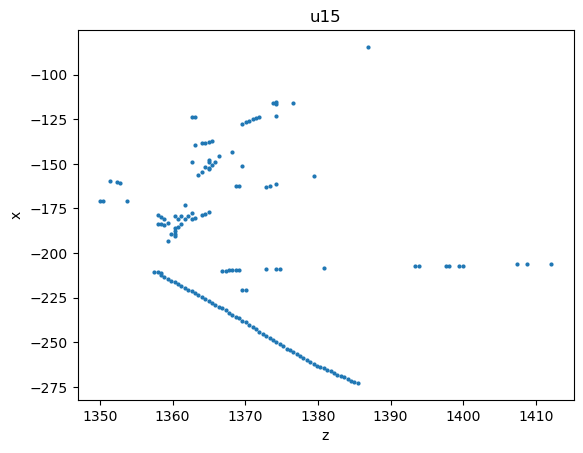

C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:176: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\OneDrive\Desktop\PX402 - Physics Project\Project Jupyter Notebooks\NeutrinoMetricGeneration.py:177: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1


Signal Points:  2


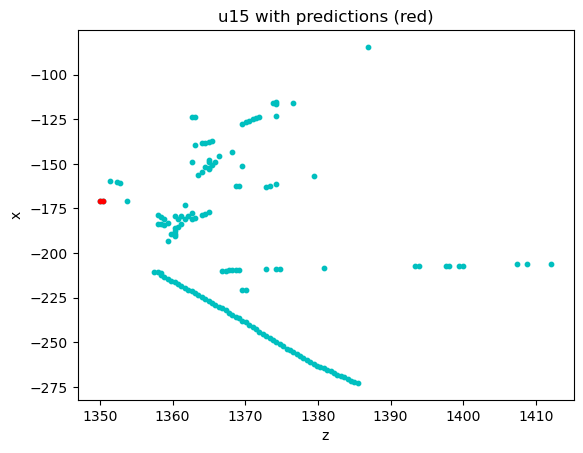

0

In [20]:
find_signal_from_BDT("u", 15)

In [8]:
def find_signal_from_BDT_prob(plane, event):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event)

    plt.scatter(AoI_z, AoI_x, s=4)
    plt.title(str(plane)+str(event))
    plt.xlabel("z")
    plt.ylabel("x")
    plt.show()
    
    df_event = generate_score_dataframe(plane, event)
    df_event = df_event.dropna()
    plt.clf()
    
    df_eventx, df_eventy = df_event[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_event[['Distance from vertex']]

    df_event_preds = bdt.predict_proba(df_eventx)
    df_event_preds_sig = df_event_preds[:, 1]
    df_event_preds_sig = ((df_event_preds_sig * 2) ** 15) #this just extends the colour mapping - has no effect
    
    plt.scatter(AoI_z, AoI_x, c=df_event_preds_sig, cmap='jet', s=10)
    plt.title(str(plane)+str(event)+" with prediction probability")
    plt.xlabel("z")
    plt.ylabel("x")
    plt.show()
    
    return 0

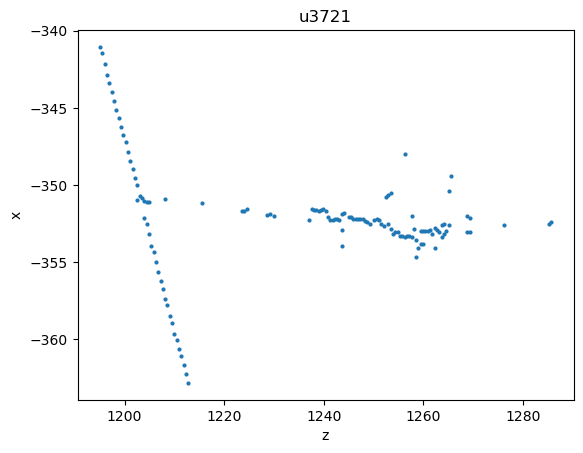

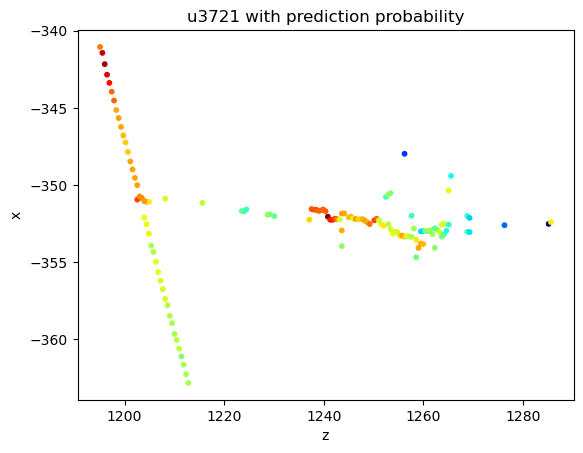

0

In [22]:
find_signal_from_BDT_prob("u", 3721)

In [23]:
#np.count_nonzero(df_event_preds[:, 1] > 0.5)

In [ ]:
def generate_3D_predictions(event, models=True, plots=False):
    AoI_xu, AoI_zu, AoI_adcu, AoI_truevtxzu, AoI_truevtxxu = AoI("u", event)
    AoI_xv, AoI_zv, AoI_adcv, AoI_truevtxzv, AoI_truevtxxv = AoI("v", event)
    AoI_xw, AoI_zw, AoI_adcw, AoI_truevtxzw, AoI_truevtxxw = AoI("w", event)
    
    df_eventu_original = generate_score_dataframe("u", event)
    df_eventv_original = generate_score_dataframe("v", event)
    df_eventw_original = generate_score_dataframe("w", event)
    
    df_eventu = df_eventu_original.copy()
    df_eventv = df_eventv_original.copy()
    df_eventw = df_eventw_original.copy()
    
    df_eventu['AoI_x'] = AoI_xu
    df_eventu['AoI_z'] = AoI_zu
    df_eventv['AoI_x'] = AoI_xv
    df_eventv['AoI_z'] = AoI_zv
    df_eventw['AoI_x'] = AoI_xw
    df_eventw['AoI_z'] = AoI_zw
    
    df_eventu = df_eventu.dropna()
    df_eventv = df_eventv.dropna()
    df_eventw = df_eventw.dropna()
    
    plt.close()
    
    df_eventux, df_eventuy = df_eventu[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_eventu[['Distance from vertex']]
    df_eventvx, df_eventvy = df_eventv[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_eventv[['Distance from vertex']]
    df_eventwx, df_eventwy = df_eventw[['LZ Scores', 'RPHI Scores', 'QuadVertex Scores']], df_eventw[['Distance from vertex']]

    
    filename = 'modelunew.sav'
    load_modelu = pickle.load(open(filename, 'rb'))

    filename = 'modelvnew.sav'
    load_modelv = pickle.load(open(filename, 'rb'))

    filename = 'modelwnew.sav'
    load_modelw = pickle.load(open(filename, 'rb'))
    
    df_event_predsu = load_modelu.predict_proba(df_eventux)
    df_event_preds_sigu = df_event_predsu[:, 1]
    df_event_preds_sigu = ((df_event_preds_sigu * 2) ** 15) #this just extends the colour mapping - has no effect
    
    if plots == True:
        plt.scatter(AoI_zu, AoI_xu, c=df_event_preds_sigu, cmap='jet', s=10)
        plt.title("u"+str(event)+" with prediction probability")
        plt.xlabel("z")
        plt.ylabel("x")
        plt.show()
    
    df_event_predsv = load_modelv.predict_proba(df_eventvx)
    df_event_preds_sigv = df_event_predsv[:, 1]
    df_event_preds_sigv = ((df_event_preds_sigv * 2) ** 15) #this just extends the colour mapping - has no effect
    
    if plots == True:
        plt.scatter(AoI_zv, AoI_xv, c=df_event_preds_sigv, cmap='jet', s=10)
        plt.title("v"+str(event)+" with prediction probability")
        plt.xlabel("z")
        plt.ylabel("x")
        plt.show()
    
    df_event_predsw = load_modelw.predict_proba(df_eventwx)
    df_event_preds_sigw = df_event_predsw[:, 1]
    df_event_preds_sigw = ((df_event_preds_sigw * 2) ** 15) #this just extends the colour mapping - has no effect
    
    if plots == True:
        plt.scatter(AoI_zw, AoI_xw, c=df_event_preds_sigw, cmap='jet', s=10)
        plt.title("w"+str(event)+" with prediction probability")
        plt.xlabel("z")
        plt.ylabel("x")
        plt.show()
    
    return df_event_preds_sigu, df_eventu, df_event_preds_sigv, df_eventv, df_event_preds_sigw, df_eventw

In [9]:
filename = 'modelu.sav'
load_modelu = pickle.load(open(filename, 'rb'))

filename = 'modelv.sav'
load_modelv = pickle.load(open(filename, 'rb'))

filename = 'modelw.sav'
load_modelw = pickle.load(open(filename, 'rb'))

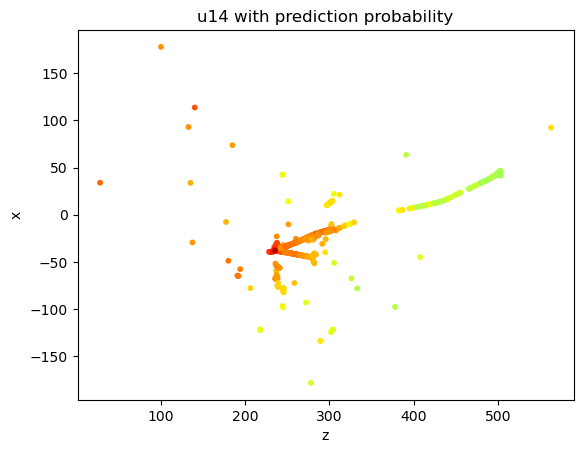

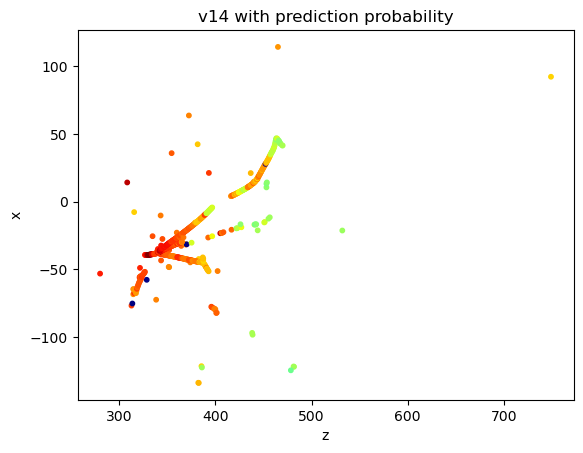

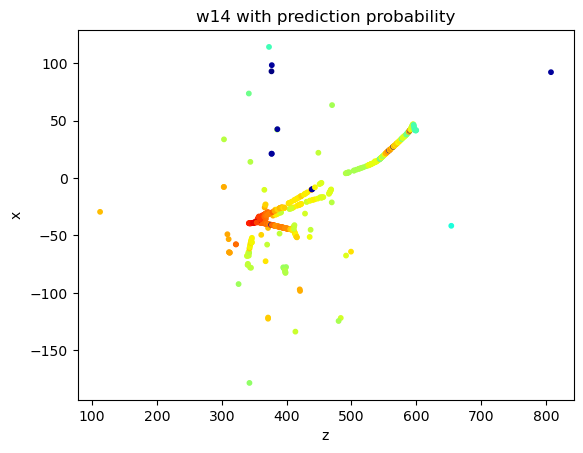

(array([0.5879907 , 0.68520659, 0.6837352 , 0.72365764, 0.72139529,
        0.68973184, 0.71502674, 0.712183  , 0.59646397, 0.59646397,
        0.59646397, 0.85157189, 0.79827727, 0.80363643, 0.79827727,
        0.79827727, 0.79827727, 0.81343117, 0.81343117, 0.83838628,
        0.83838628, 0.83838628, 0.84243528, 0.8282562 , 0.83684227,
        0.90009275, 0.85924327, 0.85924327, 0.85246515, 0.8282562 ,
        0.8443707 , 0.77774147, 0.76925799, 0.76464653, 0.74032633,
        0.74032633, 0.74032633, 0.72930649, 0.74837565, 0.74837565,
        0.74837565, 0.70120634, 0.74032633, 0.74032633, 0.72489218,
        0.72489218, 0.72489218, 0.72139529, 0.72139529, 0.71699968,
        0.71699968, 0.71679927, 0.71476268, 0.71476268, 0.70972904,
        0.70972904, 0.75290512, 0.75881145, 0.75881145, 0.75881145,
        0.75881145, 0.75881145, 0.75881145, 0.75881145, 0.75881145,
        0.77176905, 0.75450106, 0.75450106, 0.75450106, 0.74767749,
        0.74767749, 0.74767749, 0.74767749, 0.74

In [26]:
generate_3D_predictions(14)

In [ ]:
theta_u = 0.623257100582
theta_v = -0.623257100582
theta_w = 0.

cos_u = np.cos(theta_u)
cos_v = np.cos(theta_v)
cos_w = np.cos(theta_w)
sin_u = np.sin(theta_u)
sin_v = np.sin(theta_v)
sin_w = np.sin(theta_w)

sin_dvu = np.sin(theta_v - theta_u)
sin_dwv = np.sin(theta_w - theta_v)
sin_duw = np.sin(theta_u - theta_w)

def uv_to_y(u, v):
    return ((u * cos_v - v * cos_u) / sin_dvu)

def uv_to_z(u, v):
    return ((u * sin_v - v * sin_u) / sin_dvu)

def uw_to_y(u, w):
    return ((w * cos_u - u * cos_w) / sin_duw)

def uw_to_z(u, w):
    return ((w * sin_u - u * sin_w) / sin_duw)

def vw_to_y(v, w):
    return ((v * cos_w - w * cos_v) / sin_dwv)

def vw_to_z(v, w):
    return ((v * sin_w - w * sin_v) / sin_dwv)

# 3D to wire
def yz_to_u(y, z):
    return z * cos_u - y * sin_u

def yz_to_v(y, z):
    return z * cos_v - y * sin_v

def yz_to_w(y, z):
    return z * cos_w - y * sin_w

def generate_most_likely_pos_3D(event, plots=False):
    plt.close()
    if plots == True:
        df_event_preds_sigu, df_eventu, df_event_preds_sigv, df_eventv, df_event_preds_sigw, df_eventw = generate_3D_predictions(event, plots=True)
    else:
        df_event_preds_sigu, df_eventu, df_event_preds_sigv, df_eventv, df_event_preds_sigw, df_eventw = generate_3D_predictions(event, plots=False)
    AoI_xu, AoI_zu, AoI_adcu, AoI_truevtxzu, AoI_truevtxxu = AoI("u", event)
    AoI_xv, AoI_zv, AoI_adcv, AoI_truevtxzv, AoI_truevtxxv = AoI("v", event)
    AoI_xw, AoI_zw, AoI_adcw, AoI_truevtxzw, AoI_truevtxxw = AoI("w", event)
    
    true_pos_array = np.empty([3,2])
    
    uvy_true, uwy_true, vwy_true = uv_to_y(AoI_truevtxzu, AoI_truevtxzv), uw_to_y(AoI_truevtxzu, AoI_truevtxzw), vw_to_y(AoI_truevtxzv, AoI_truevtxzw)
    uvz_true, uwz_true, vwz_true = uv_to_z(AoI_truevtxzu, AoI_truevtxzv), uw_to_z(AoI_truevtxzu, AoI_truevtxzw), vw_to_z(AoI_truevtxzv, AoI_truevtxzw)
    
    true_pos_array[0][0], true_pos_array[0][1] = uvy_true, uvz_true
    true_pos_array[1][0], true_pos_array[1][1] = uwy_true, uwz_true
    true_pos_array[2][0], true_pos_array[2][1] = vwy_true, vwz_true
    
    index = np.argmax(df_event_preds_sigu)
    positionxu, positionzu = df_eventu['AoI_x'][index], df_eventu['AoI_z'][index]
    
    index = np.argmax(df_event_preds_sigv)
    positionxv, positionzv = df_eventv['AoI_x'][index], df_eventv['AoI_z'][index]
    
    index = np.argmax(df_event_preds_sigw)
    positionxw, positionzw = df_eventw['AoI_x'][index], df_eventw['AoI_z'][index]
    
    uvy, uwy, vwy = uv_to_y(positionzu, positionzv), uw_to_y(positionzu, positionzw), vw_to_y(positionzv, positionzw)
    uvz, uwz, vwz = uv_to_z(positionzu, positionzv), uw_to_z(positionzu, positionzw), vw_to_z(positionzv, positionzw)
    
    true_x = (AoI_truevtxxu + AoI_truevtxxv + AoI_truevtxxw) / 3
    mean_x = (positionxu + positionxv + positionxw) / 3
    
    y_pos_list = [uvy, uwy, vwy]
    z_pos_list = [uvz, uwz, vwz]
    
    return y_pos_list, z_pos_list, true_pos_array, true_x, mean_x
    

In [17]:
y_pos_list, z_pos_list, true_pos_array, true_x, mean_x = generate_most_likely_pos_3D(76, False)

In [18]:
print("Y Positions: ", y_pos_list)
print("Z Positions: ", z_pos_list)
print("True Position array: ", true_pos_array)
#print(np.mean(true_pos_array, axis = 0))

Y Positions:  [-635.2058855278248, -670.4591060041489, -599.9526650515007]
Z Positions:  [541.0146198670603, 515.6732788085938, 515.6732788085938]
True Position array:  [[-577.68502175  503.01393161]
 [-577.68504345  503.01391602]
 [-577.68500006  503.01391602]]


In [ ]:
def generate_distance_from_true_via_BDT(event):
    y_pos_list, z_pos_list, true_pos_array, true_x, mean_x = generate_most_likely_pos_3D(event)
    
    mean_of_yz_true = np.mean(true_pos_array, axis = 0)
    mean_y, mean_z = np.mean(y_pos_list), np.mean(z_pos_list)
    
    y_diff = np.abs(mean_of_yz_true[0] - mean_y)
    z_diff = np.abs(mean_of_yz_true[1] - mean_z)
    x_diff = np.abs(mean_x - true_x)
    
    r_diff = np.sqrt(y_diff ** 2 + z_diff ** 2 + x_diff ** 2)
    
    return r_diff, z_diff, y_diff, x_diff
    


In [20]:
sample = random.sample(range(0, len(u_x)), 3000)

In [ ]:
def create_BDT_metrics_3D(sample):
    x_hist_data = [None] * len(sample)
    y_hist_data = [None] * len(sample)
    z_hist_data = [None] * len(sample)
    r_hist_data = [None] * len(sample)
    for i in tqdm(range(len(sample))):
        try:
            r_hist_data[i], x_hist_data[i], y_hist_data[i], z_hist_data[i] = generate_distance_from_true_via_BDT(sample[i])
        except:
            continue
    
    return z_hist_data, y_hist_data, x_hist_data, r_hist_data
        

In [ ]:
def create_r68_and_50cm(hist_data):
    r68 =  np.percentile(hist_data, 68)
    fifty_cm_list = [num for num in hist_data if num > 50]
    pecentage_fifty_cm = len(fifty_cm_list) / len(hist_data)
    
    return r68, pecentage_fifty_cm

In [ ]:
z_hist_data, y_hist_data, x_hist_data, r_hist_data = create_BDT_metrics_3D(sample)

In [31]:
x_hist_data_filtered = list(filter(lambda item: item is not None, x_hist_data))
y_hist_data_filtered = list(filter(lambda item: item is not None, y_hist_data))
z_hist_data_filtered = list(filter(lambda item: item is not None, z_hist_data))
r_hist_data_filtered = list(filter(lambda item: item is not None, r_hist_data))

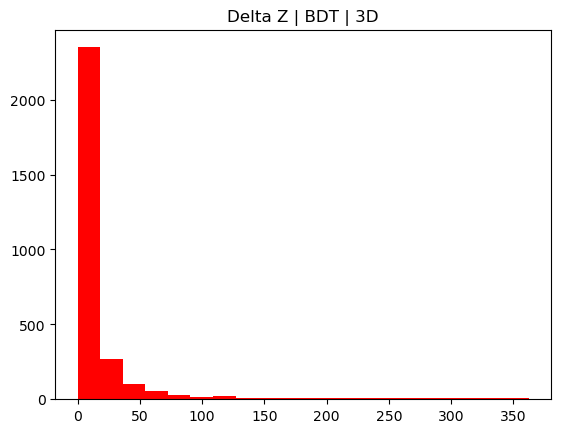

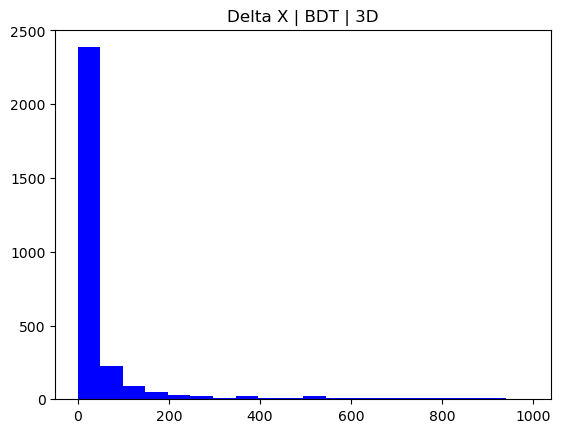

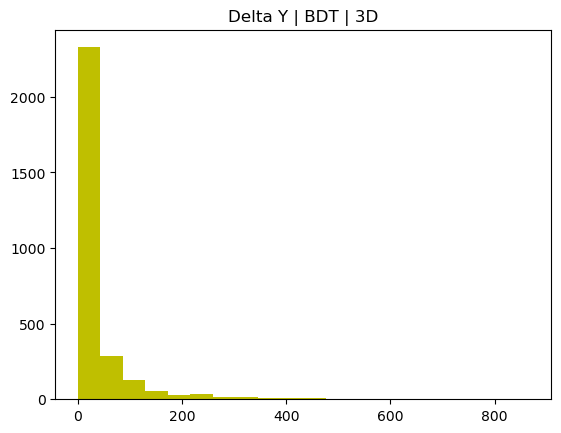

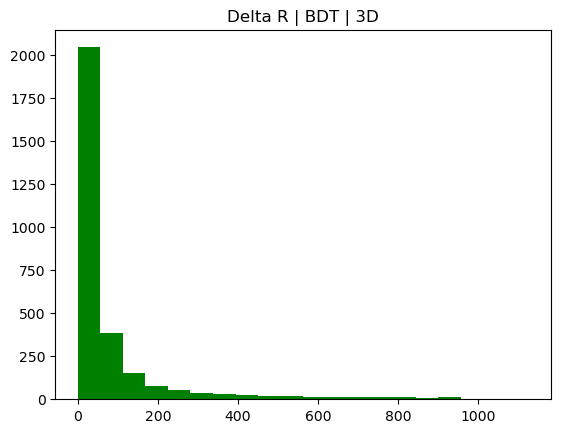

9.561898600260438 0.08095238095238096
26.017547611624938 0.1826530612244898
26.97267481871697 0.18741496598639457
53.15673775989436 0.3326530612244898


In [32]:


plt.clf()
x = plt.hist(z_hist_data_filtered, 20, color='r')
title = plt.title("Delta Z | BDT | 3D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data_filtered, 20, color='b')
title = plt.title("Delta X | BDT | 3D")
plt.show()

plt.clf()
x = plt.hist(y_hist_data_filtered, 20, color='y')
title = plt.title("Delta Y | BDT | 3D")
plt.show()

plt.clf()
x = plt.hist(r_hist_data_filtered, 20, color='g')
title = plt.title("Delta R | BDT | 3D")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data_filtered)
r68Y, pecentage_fifty_cmY = create_r68_and_50cm(y_hist_data_filtered)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data_filtered)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data_filtered)

print(r68Z, pecentage_fifty_cmZ)
print(r68Y, pecentage_fifty_cmY)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [12]:
def histogram_of_r_BDT(no_events):
    histogram_of_r_data = [0] * no_events
    sample = random.sample(range(0, len(u_x)), no_events)
    bad_events = []
    for i in tqdm(range(len(sample))):
        try:
            histogram_of_r_data[i] = generate_distance_from_true_via_BDT(sample[i])
        except:
            bad_events.append(sample[i])
            pass
    print(bad_events)
    plt.clf()
    plt.hist(histogram_of_r_data, 10, color='cyan')
    title = plt.title("Distances from true interaction vertex: 3D BDT")
    plt.show()
    return histogram_of_r_data

In [30]:
#histogram_values = histogram_of_r_BDT(1)

In [31]:
#print(histogram_values)

In [46]:
percentile_value = np.percentile(histogram_values, 68)

In [47]:
print(percentile_value)

15.280438949262393
